In [1]:
import json

source = '/mnt/VLAI_data/InfographicVQA/question_answer/infographicsVQA_val_v1.0_withQT.json'
target = '/mnt/VLAI_data/InfographicVQA/infographicvqa_val.jsonl'

with open(source, 'r', encoding='utf-8') as f:
    src = json.load(f)

with open(target, 'r', encoding='utf-8') as f:
    lines = [json.loads(l) for l in f]

src_map = {item["questionId"]: item for item in src["data"]}

for item in lines:
    sid = item["question_id"]
    if sid in src_map:
        s = src_map[sid]
        item["answer_type"] = s.get("answer_type", [])
        item["evidence"] = s.get("evidence", [])
        item["operation/reasoning"] = s.get("operation/reasoning", [])
        item["ocr_output_file"] = s.get("ocr_output_file", "")

with open(target, 'w', encoding='utf-8') as f:
    for item in lines:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')


In [ ]:
import json
from pathlib import Path

def extract_last(conversation, role):
    """Lấy content của turn cuối cùng theo role ('human' hoặc 'assistant')."""
    for turn in reversed(conversation or []):
        if turn.get("role") == role:
            content = turn.get("content").replace('<image>')
            return turn.get("content")
    return None

def convert_jsonl(
    input_path="/mnt/VLAI_data/ChartGalaxy/eval_data/eval/test.jsonl",
    output_path="/mnt/VLAI_data/ChartGalaxy/test.jsonl"
):
    inp = Path(input_path)
    out = Path(output_path)
    out.parent.mkdir(parents=True, exist_ok=True)

    with inp.open("r", encoding="utf-8") as f_in, out.open("w", encoding="utf-8") as f_out:
        for line in f_in:
            line = line.strip()
            if not line:
                continue
            obj = json.loads(line)

            conv = obj.get("conversation", [])
            question = extract_last(conv, "human")
            answer = extract_last(conv, "assistant")

            obj["question"] = question
            obj["answer"] = answer

            f_out.write(json.dumps(obj, ensure_ascii=False) + "\n")

if __name__ == "__main__":
    convert_jsonl()


In [2]:
import json

path = "/mnt/VLAI_data/ChartGalaxy/test.jsonl"

# Đọc dữ liệu JSONL
with open(path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

# Lấy phần metadata của mỗi mẫu
metas = [item["metadata"] for item in data if "metadata" in item]

# Lấy các trường trong metadata
fields = metas[0].keys()

# Tìm giá trị unique của từng trường
unique_values = {field: sorted(set(meta[field] for meta in metas if field in meta))
                 for field in fields}

# In kết quả
for k, v in unique_values.items():
    print(f"{k}: {v}")


source: ['chart_data']
category: ['composite understanding', 'data understanding', 'visual understanding']
difficulty: ['medium']
type: ['calculation', 'comparison', 'counting', 'identification', 'trend analysis', 'visual analysis']
subcategory: ['chart classification', 'data comparison', 'data counting with condition', 'data extraction with condition', 'data identification', 'fact checking', 'style detection', 'visual elements retrieval']


In [3]:
import matplotlib
import os

try:
    # Lấy đường dẫn thư mục cache
    cache_dir = matplotlib.get_cachedir()
    print(f"Thư mục cache của Matplotlib là: {cache_dir}")

    # Tìm file fontlist cache (thường có tên fontlist-vXXX.json)
    cache_file = None
    for f in os.listdir(cache_dir):
        if f.startswith('fontlist-') and f.endswith('.json'):
            cache_file = os.path.join(cache_dir, f)
            break
    
    if cache_file and os.path.exists(cache_file):
        print(f"Đang xóa file cache: {cache_file}")
        os.remove(cache_file)
        print("Đã xóa cache thành công! ✅")
    else:
        print("Không tìm thấy file fontlist cache.")

except Exception as e:
    print(f"Đã xảy ra lỗi khi xóa cache: {e}")

Thư mục cache của Matplotlib là: /home/binhdt/.cache/matplotlib
Đang xóa file cache: /home/binhdt/.cache/matplotlib/fontlist-v390.json
Đã xóa cache thành công! ✅


In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

def create_problem_visualization_pdf():
    
    # === Cấu hình Font ===
    # Sử dụng sau khi đã cài Times New Roman và xóa cache
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    # Bây giờ dòng này sẽ hoạt động
    matplotlib.rcParams['font.serif'] = ['Times New Roman'] 
    matplotlib.rcParams['axes.unicode_minus'] = False

    # Dữ liệu
    X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9, 10.0])
    y = np.array([0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   1,   1,   1,   1,   1])
    
    X_reshaped = X.reshape(-1, 1)

    # Huấn luyện
    model_lin = LinearRegression().fit(X_reshaped, y)
    model_log = LogisticRegression(solver='lbfgs').fit(X_reshaped, y)

    # Tạo đường dự đoán
    X_line = np.linspace(-2, 15, 100).reshape(-1, 1)
    y_line_lin_pred = model_lin.predict(X_line)
    y_line_log_pred = model_log.predict_proba(X_line)[:, 1]

    # Vẽ
    plt.figure(figsize=(9, 6))
    plt.scatter(X[y==0], y[y==0], color='red', s=50, alpha=0.7, label='0 (Trượt)')
    plt.scatter(X[y==1], y[y==1], color='blue', s=50, alpha=0.7, label='1 (Đậu)')
    plt.plot(X_line, y_line_lin_pred, color='green', linewidth=2, linestyle=':',
             label='Linear Regression')
    plt.plot(X_line, y_line_log_pred, color='purple', linewidth=2.5,
             label='Logistic Regression')
    
    plt.axhline(y=1, color='gray', linestyle='--', label='Ngưỡng "Đậu" (y=1)')
    plt.axhline(y=0, color='gray', linestyle='--', label='Ngưỡng "Trượt" (y=0)')

    # Định dạng
    plt.xlabel('Số giờ ôn tập (x)', fontsize=20)
    plt.ylabel('Xác suất đậu', fontsize=20)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-1, 11)
    plt.legend(loc='best', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Lưu file
    output_filename = 'linear_vs_logistic_regression.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF thành công: {output_filename}")
    print("File PDF này (với font Times New Roman) đã được nhúng TrueType.")

if __name__ == '__main__':
    create_problem_visualization_pdf()

Đã tạo file PDF thành công: linear_vs_logistic_regression.pdf
File PDF này (với font Times New Roman) đã được nhúng TrueType.


In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Chỉ import LinearRegression

def create_problem_visualization_pdf():
    
    # === Cấu hình Font ===
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    try:
        matplotlib.rcParams['font.serif'] = ['Times New Roman'] 
    except:
        print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
    matplotlib.rcParams['axes.unicode_minus'] = False

    # Dữ liệu
    X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9, 10.0])
    y = np.array([0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   1,   1,   1,   1,   1])
    
    X_reshaped = X.reshape(-1, 1)

    # === Chỉ huấn luyện Linear Regression ===
    model_lin = LinearRegression().fit(X_reshaped, y)

    # Tạo đường dự đoán
    X_line = np.linspace(-2, 15, 100).reshape(-1, 1)
    y_line_lin_pred = model_lin.predict(X_line)
    # === Không cần y_line_log_pred ===

    # === Vẽ Biểu đồ 1 ===
    plt.figure(figsize=(7, 5))
    plt.scatter(X[y==0], y[y==0], color='red', s=50, alpha=0.7, label='0 (Trượt)')
    plt.scatter(X[y==1], y[y==1], color='blue', s=50, alpha=0.7, label='1 (Đậu)')
    
    # Chỉ vẽ đường Linear Regression
    plt.plot(X_line, y_line_lin_pred, color='green', linewidth=2, linestyle=':',
             label='Linear Regression')
    
    # === Không vẽ đường Logistic Regression ===
    
    plt.axhline(y=1, color='gray', linestyle='--', label='Ngưỡng "Đậu" (y=1)')
    plt.axhline(y=0, color='gray', linestyle='--', label='Ngưỡng "Trượt" (y=0)')

    # Định dạng
    plt.xlabel('Số giờ ôn tập (x)', fontsize=20)
    plt.ylabel('Giá trị dự đoán', fontsize=20) # Đổi tên trục y
    plt.ylim(-0.4, 1.4) # Mở rộng trục y để thấy rõ vấn đề
    plt.xlim(-1, 11)
    plt.legend(loc='lower right', fontsize=14) # Đổi vị trí legend
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Chỉnh sửa layout
    plt.tight_layout()

    # === Lưu file 1 ===
    output_filename = 'linear_regression_problem.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF (Vấn đề) thành công: {output_filename}")

if __name__ == '__main__':
    create_problem_visualization_pdf()


Đã tạo file PDF (Vấn đề) thành công: linear_regression_problem.pdf


In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Chỉ import LogisticRegression

def create_solution_visualization_pdf():
    
    # === Cấu hình Font ===
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    try:
        matplotlib.rcParams['font.serif'] = ['Times New Roman'] 
    except:
        print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
    matplotlib.rcParams['axes.unicode_minus'] = False

    # Dữ liệu
    X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9, 10.0])
    y = np.array([0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   1,   1,   1,   1,   1])
    
    X_reshaped = X.reshape(-1, 1)

    # === Chỉ huấn luyện Logistic Regression ===
    model_log = LogisticRegression(solver='lbfgs').fit(X_reshaped, y)

    # Tạo đường dự đoán
    X_line = np.linspace(-2, 15, 100).reshape(-1, 1)
    y_line_log_pred = model_log.predict_proba(X_line)[:, 1]
    # === Không cần y_line_lin_pred ===

    # === Vẽ Biểu đồ 2 ===
    plt.figure(figsize=(8, 5))
    plt.scatter(X[y==0], y[y==0], color='red', s=80, alpha=0.7, label='0 (Trượt)')
    plt.scatter(X[y==1], y[y==1], color='blue', s=80, alpha=0.7, label='1 (Đậu)')
    
    # === Không vẽ đường Linear Regression ===

    # Chỉ vẽ đường Logistic Regression
    plt.plot(X_line, y_line_log_pred, color='purple', linewidth=2.5,
             label='Logistic Regression')
    
    plt.axhline(y=1, color='gray', linestyle='--') # Bỏ label
    plt.axhline(y=0, color='gray', linestyle='--') # Bỏ label

    # Định dạng
    plt.xlabel('Số giờ ôn tập (x)', fontsize=20)
    plt.ylabel('Xác suất đậu', fontsize=20)
    plt.ylim(-0.1, 1.1) # Giữ nguyên trục y
    plt.xlim(-1, 11)
    plt.legend(loc='center right', fontsize=18) # Đổi vị trí legend
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # Chỉnh sửa layout
    plt.tight_layout()

    # === Lưu file 2 ===
    output_filename = 'logistic_regression_solution.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF (Giải pháp) thành công: {output_filename}")

if __name__ == '__main__':
    create_solution_visualization_pdf()


Đã tạo file PDF (Giải pháp) thành công: logistic_regression_solution.pdf


In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def create_sigmoid_plot_pdf():
    """
    Tạo biểu đồ hàm Logistic (Sigmoid) và lưu dưới dạng PDF
    với font chữ có thể bôi đen được (embeddable).
    """
    
    # === 1. Cấu hình Matplotlib ===
    # Đảm bảo text trong file PDF là font TrueType (loại 42)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['font.serif'] = ['Times New Roman'] 
    matplotlib.rcParams['axes.unicode_minus'] = False

    # === 2. Định nghĩa hàm Sigmoid ===
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # === 3. Tạo dữ liệu ===
    # Tạo một dải giá trị z từ -8 đến 8 để thể hiện rõ hình chữ S
    z = np.linspace(-8, 8, 400)
    gz = sigmoid(z)

    # === 4. Vẽ biểu đồ ===
    plt.figure(figsize=(7, 5)) # Kích thước phù hợp
    
    # Vẽ đường cong Sigmoid chính
    plt.plot(z, gz, 'b-', linewidth=2.5, label='$g(z) = \\frac{1}{1 + e^{-z}}$')

    # === 5. Minh họa các tính chất (quan trọng) ===
    
    # 5.1. Các đường tiệm cận (Asymptotes)
    # g(z) -> 1 khi z -> +inf
    plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
    # g(z) -> 0 khi z -> -inf
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    # 5.2. Điểm trung tâm (z=0)
    # Đường gióng tại z=0
    plt.axvline(x=0, color='red', linestyle=':', linewidth=1.2)
    # Đường gióng tại g(z)=0.5
    plt.axhline(y=0.5, color='red', linestyle=':', linewidth=1.2)
    # Đánh dấu điểm (0, 0.5)
    plt.plot(0, 0.5, 'ro', markersize=10, label='Điểm $z=0$') 


    # === 6. Định dạng và hoàn thiện biểu đồ ===
    
    # Lấy nhãn từ caption trong file .tex của bạn
    plt.xlabel('$z$ ', fontsize=22)
    plt.ylabel('$g(z)$', fontsize=22)

    # Đặt giới hạn trục
    plt.xlim(-8, 8)
    plt.ylim(-0.05, 1.05) # Thêm chút đệm
    
    # Đảm bảo các mốc 0, 0.5, 1.0 được hiển thị rõ
    plt.yticks([0, 0.5, 1.0])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Thêm lưới và chú giải
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=16, loc='center left')
    
    plt.tight_layout()

    # === 7. Lưu file PDF ===
    # Tên file chính xác như trong code LaTeX của bạn
    output_filename = 'sigmoid_plot.pdf'
    
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close() # Đóng hình để giải phóng bộ nhớ
    
    print(f"Đã tạo file PDF thành công: {output_filename}")
    print("File PDF này minh họa hàm Sigmoid và đã nhúng font TrueType.")

if __name__ == '__main__':
    create_sigmoid_plot_pdf()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Đã tạo file PDF thành công: sigmoid_plot.pdf
File PDF này minh họa hàm Sigmoid và đã nhúng font TrueType.


In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def plot_single_threshold(ax, z, gz, threshold, z_min, z_max):
    
    z_boundary = np.log(threshold / (1 - threshold))

    ax.plot(z, gz, 'b-', linewidth=2.5, label='$g(z) = \\frac{1}{1 + e^{-z}}$')
    ax.plot(z_boundary, threshold, 'ko', markersize=8) 

    ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2)
    ax.axvline(x=z_boundary, color='green', linestyle=':', linewidth=2)

    ax.axvspan(z_min, z_boundary, facecolor='red', alpha=0.1, 
                label='Vùng dự đoán $y=0$')
    ax.axvspan(z_boundary, z_max, facecolor='blue', alpha=0.1, 
                label='Vùng dự đoán $y=1$')

    text_x_0 = (z_min + z_boundary) / 2
    text_x_1 = (z_max + z_boundary) / 2
    text_y_trượt = (1.0 + threshold) / 2.0
    # Văn bản "Đậu" (màu xanh) sẽ được đặt ở phía dưới đường ngưỡng
    text_y_đậu = threshold / 2.0
    
    ax.text(text_x_0, text_y_trượt, f'Nếu $\hat{{y}} < {threshold}$\nDự đoán: $y=0$ (Trượt)',
             fontsize=16.5, horizontalalignment='center', verticalalignment='center', 
             color='darkred')
    ax.text(text_x_1, text_y_đậu, f'Nếu $\hat{{y}} \geq {threshold}$\nDự đoán: $y=1$ (Đậu)',
             fontsize=16.5, horizontalalignment='center', verticalalignment='center', 
             color='darkblue')

    ax.set_xlabel('$z$', fontsize=16)
    ax.set_title(f'Ngưỡng = {threshold}', fontsize=20)
    ax.set_xlim(z_min, z_max)
    ax.set_ylim(-0.05, 1.05)
    
    ax.set_yticks(sorted(list(set([0, threshold, 0.5, 1.0]))))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, linestyle=':', alpha=0.5)

def create_multiple_thresholds_pdf():
    
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['font.serif'] = ['Times New Roman']
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['axes.unicode_minus'] = False

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    z_min, z_max = -8, 8
    z_data = np.linspace(z_min, z_max, 400)
    gz_data = sigmoid(z_data)

    thresholds_to_plot = [0.3, 0.5, 0.8]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    axes[0].set_ylabel('$\hat{y}$', fontsize=16)

    for ax, thresh in zip(axes, thresholds_to_plot):
        plot_single_threshold(ax, z_data, gz_data, thresh, z_min, z_max)
    
    handles, labels = axes[0].get_legend_handles_labels()
    
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), 
               ncol=3, fontsize=18)

    plt.tight_layout(rect=[0, 0.03, 1, 0.93])

    output_filename = 'sigmoid_multiple_thresholds.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF thành công: {output_filename}")
    print(f"File PDF này minh họa 3 ngưỡng quyết định: {thresholds_to_plot}")

if __name__ == '__main__':
    create_multiple_thresholds_pdf()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Đã tạo file PDF thành công: sigmoid_multiple_thresholds.pdf
File PDF này minh họa 3 ngưỡng quyết định: [0.3, 0.5, 0.8]


In [73]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def create_bce_loss_visualization():
    
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    try:
        matplotlib.rcParams['font.serif'] = ['Times New Roman']
    except:
        print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
    matplotlib.rcParams['axes.unicode_minus'] = False

    y_hat = np.linspace(1e-3, 1 - 1e-3, 400)

    loss_1 = -np.log(y_hat)
    loss_0 = -np.log(1 - y_hat)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    y_limit = (-0.2, 5.2)
    x_limit = (-0.05, 1.05)
    
    # --- Biểu đồ 1: Trường hợp y = 1 (Đậu) ---
    
    ax1.plot(y_hat, loss_1, color='#0033A0', linewidth=3) # Màu xanh đậm hơn
    ax1.set_title('Trường hợp 1: Nhãn thực tế $y=1$ (Đậu)', fontsize=20, color='#0033A0')
    ax1.grid(True, linestyle=':', alpha=0.7)
    ax1.set_xlim(x_limit)
    ax1.set_ylim(y_limit)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    ax1.axhline(0, color='black', linewidth=1.2, zorder=0)
    ax1.axvline(0, color='black', linewidth=1.2, zorder=0)

    ax1.text(0.5, 4, '$L = -\log(\hat{y})$', fontsize=25, color='#0033A0', 
             horizontalalignment='center')

    # Đổi marker thành 's' (vuông)
    x_sai = 0.1
    y_sai = -np.log(x_sai)
    ax1.plot(x_sai, y_sai, 's', color='#0033A0', markersize=10, markeredgecolor='black')
    ax1.text(x_sai +0.35, y_sai + 0.2, f'($\hat{{y}}={x_sai}, L \\approx {y_sai:.1f}$)', 
             fontsize=18, color='darkred', horizontalalignment='right')

    x_dung = 0.9
    y_dung = -np.log(x_dung)
    ax1.plot(x_dung, y_dung, 's', color='#0033A0', markersize=10, markeredgecolor='black')
    ax1.text(x_dung +0.12, y_dung + 0.5, f'($\hat{{y}}={x_dung}, L \\approx {y_dung:.1f}$)', 
             fontsize=18, color='darkgreen', horizontalalignment='right')

    # Thêm mũi tên và văn bản bên dưới
    ax1.annotate('', xy=(1, -0.1), xycoords='axes fraction', 
                 xytext=(0, -0.1), 
                 arrowprops=dict(arrowstyle="<-, head_width=0.4, head_length=0.8", 
                                 color='blue', ls='--', lw=2))
    ax1.text(0.5, -0.2, 'Loss giảm khi $\hat{y} \\to 1$', 
             transform=ax1.transAxes, ha='center', fontsize=16, color='blue')

    
    # --- Biểu đồ 2: Trường hợp y = 0 (Trượt) ---
    
    ax2.plot(y_hat, loss_0, color='#C00000', linewidth=3) # Màu đỏ đậm hơn
    ax2.set_title('Trường hợp 2: Nhãn thực tế $y=0$ (Trượt)', fontsize=20, color='#C00000')
    
    
    ax2.grid(True, linestyle=':', alpha=0.7)
    ax2.set_xlim(x_limit)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    ax2.axhline(0, color='black', linewidth=1.2, zorder=0)
    ax2.axvline(0, color='black', linewidth=1.2, zorder=0)

    ax2.text(0.5, 4, '$L = -\log(1 - \hat{y})$', fontsize=25, color='#C00000', 
             horizontalalignment='center')
             
    # Đổi marker thành 'x' (cross)
    x_dung_0 = 0.1
    y_dung_0 = -np.log(1 - x_dung_0)
    ax2.plot(x_dung_0, y_dung_0, 'x', color='red', markersize=12, markeredgewidth=2.5)
    ax2.text(x_dung_0 -0.08, y_dung_0 + 0.4, f'($\hat{{y}}={x_dung_0}, L \\approx {y_dung_0:.1f}$)', 
             fontsize=18, color='darkgreen', verticalalignment='bottom')

    x_sai_0 = 0.9
    y_sai_0 = -np.log(1 - x_sai_0)
    ax2.plot(x_sai_0, y_sai_0, 'x', color='red', markersize=12, markeredgewidth=2.5)
    ax2.text(x_sai_0 - 0.35, y_sai_0 + 0.2, f'($\hat{{y}}={x_sai_0}, L \\approx {y_sai_0:.1f}$)', 
             fontsize=18, color='darkred', verticalalignment='bottom')

    # Thêm mũi tên và văn bản bên dưới
    ax2.annotate('', xy=(0, -0.1), xycoords='axes fraction', 
                 xytext=(1, -0.1), 
                 arrowprops=dict(arrowstyle="<-, head_width=0.4, head_length=0.8", 
                                 color='red', ls='--', lw=2))
    ax2.text(0.5, -0.2, 'Loss giảm khi $\hat{y} \\to 0$', 
             transform=ax2.transAxes, ha='center', fontsize=16, color='red')

    # Điều chỉnh layout để chừa không gian cho văn bản bên dưới
    plt.subplots_adjust(bottom=0.1) 
    plt.tight_layout()
    output_filename = 'bce_loss_visualization.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF thành công: {output_filename}")
    print("File PDF này minh họa 2 trường hợp của BCE Loss (kiểu tọa độ, style mới).")

if __name__ == '__main__':
    create_bce_loss_visualization()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Đã tạo file PDF thành công: bce_loss_visualization.pdf
File PDF này minh họa 2 trường hợp của BCE Loss (kiểu tọa độ, style mới).


In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def create_convexity_visualization():
    
    # === 1. Cấu hình Font (cho PDF) ===
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['mathtext.fontset'] = 'cm' # Dùng font LaTeX
    try:
        matplotlib.rcParams['font.serif'] = ['Times New Roman']
    except:
        print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
    matplotlib.rcParams['axes.unicode_minus'] = False

    # === 2. Hàm và Dữ liệu ===
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Dữ liệu mẫu (x, y)
    x_data = np.array([1.0, 5.0]) # x1=1 (trượt), x2=5 (đỗ)
    y_data = np.array([0.0, 1.0]) # y1=0, y2=1
    
    # Tạo một dải các giá trị w để kiểm tra
    w_range = np.linspace(-4, 4, 400)
    
    # Tính toán loss cho từng giá trị w (giả sử b=0)
    J_mse = []
    J_bce = []
    
    # Thêm epsilon rất nhỏ để tránh lỗi log(0)
    epsilon = 1e-9 

    for w in w_range:
        # Tính z và y_hat cho cả hai điểm
        z = w * x_data # (z1, z2)
        y_hat = sigmoid(z) # (y_hat_1, y_hat_2)
        
        # --- Tính MSE Loss ---
        # J = 1/N * sum( (y_hat - y)^2 )
        loss_mse = np.mean((y_hat - y_data)**2)
        J_mse.append(loss_mse)
        
        # --- Tính BCE Loss ---
        # J = -1/N * sum( y*log(y_hat) + (1-y)*log(1-y_hat) )
        loss_bce = -np.mean( y_data * np.log(y_hat + epsilon) + 
                             (1 - y_data) * np.log(1 - y_hat + epsilon) )
        J_bce.append(loss_bce)

    # === 3. Vẽ 2 biểu đồ (Subplots) ===
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Biểu đồ 1: MSE Loss (Non-Convex) ---
    ax1.plot(w_range, J_mse, color='red', linewidth=2.5)
    ax1.set_title('Hàm mất mát MSE (Non-Convex)', fontsize=16, color='red')
    ax1.set_xlabel('Trọng số $w$', fontsize=14)
    ax1.set_ylabel('Mất mát $J(w)$', fontsize=14)
    ax1.grid(True, linestyle=':', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # Đánh dấu các vùng rắc rối
    ax1.annotate('Cực tiểu địa phương\n(GD có thể bị kẹt ở đây)',
                 xy=(-2.5, np.min(J_mse[0:100])), xycoords='data',
                 xytext=(-3.8, 0.25), textcoords='data',
                 fontsize=12, color='darkred',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3", 
                                 color='darkred', linewidth=1.5))
    ax1.annotate('Vùng "phẳng"\n(Gradient $\\approx 0$)',
                 xy=(3.5, J_mse[-1]), xycoords='data',
                 xytext=(1.0, 0.35), textcoords='data',
                 fontsize=12, color='darkred',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", 
                                 color='darkred', linewidth=1.5))

    # --- Biểu đồ 2: BCE Loss (Convex) ---
    ax2.plot(w_range, J_bce, color='blue', linewidth=2.5)
    ax2.set_title('Hàm mất mát BCE (Convex)', fontsize=16, color='blue')
    ax2.set_xlabel('Trọng số $w$', fontsize=14)
    ax2.set_ylabel('Mất mát $J(w)$', fontsize=14)
    ax2.grid(True, linestyle=':', alpha=0.7)
    ax2.tick_params(axis='both', which='major', labelsize=12)

    # Đánh dấu điểm tối ưu
    w_min_bce = w_range[np.argmin(J_bce)]
    min_bce = np.min(J_bce)
    ax2.plot(w_min_bce, min_bce, 'go', markersize=10, label='Global Minimum')
    
    ax2.annotate('Cực tiểu toàn cục (Global Minimum)\n(GD chắc chắn sẽ tìm thấy điểm này)',
                 xy=(w_min_bce, min_bce), xycoords='data',
                 xytext=(-2.5, 1.5), textcoords='data',
                 fontsize=12, color='darkgreen',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3", 
                                 color='darkgreen', linewidth=1.5))

    # === 4. Hoàn thiện và Lưu file ===
    fig.suptitle('So sánh bề mặt hàm mất mát (Loss Surface)', fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    output_filename = 'loss_surface_convexity.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
    print(f"Đã tạo file PDF thành công: {output_filename}")
    print("File PDF này so sánh tính lồi (convex) của MSE và BCE.")

if __name__ == '__main__':
    create_convexity_visualization()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Đã tạo file PDF thành công: loss_surface_convexity.pdf
File PDF này so sánh tính lồi (convex) của MSE và BCE.


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


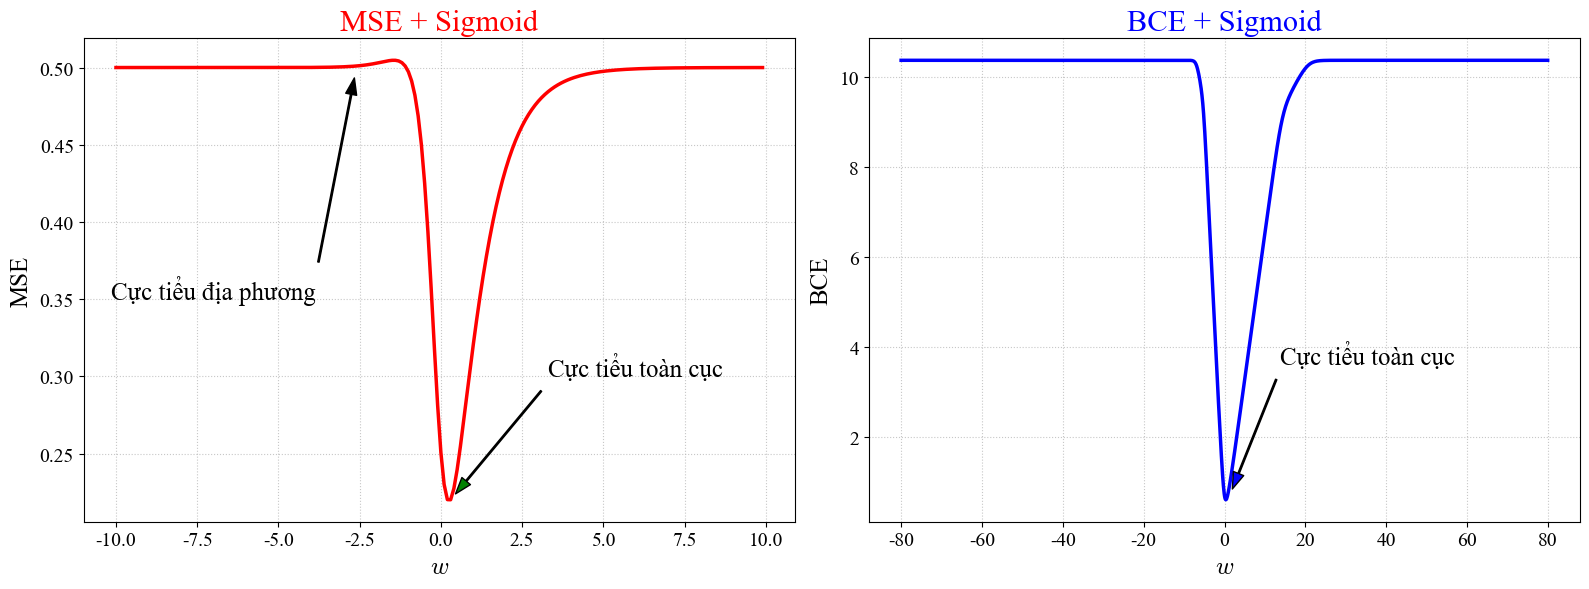

Đã tạo file PDF thành công: mse_vs_bce_convexity_final.pdf
Đã tự động tìm thấy Global Min của MSE tại w=0.30, loss=0.2201
File này minh họa sự khác biệt về tính lồi (convexity) giữa MSE và BCE.


In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# === 1. Cấu hình Matplotlib cho PDF (Giống các lần trước) ===
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'cm' # Font LaTeX cho đẹp
try:
    matplotlib.rcParams['font.serif'] = ['Times New Roman']
except:
    print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
matplotlib.rcParams['axes.unicode_minus'] = False

# === 2. Dữ liệu (Từ mô tả của bạn) ===
# Petal_Length, Label
data = np.array([
    [1.4, 0],
    [1.0, 0],
    [1.5, 0],
    [3.0, 1],
    [3.8, 1],
    [4.1, 1]
])

X = data[:, :1] # Giữ là 2D array (shape [6, 1])
y = data[:, 1:] # Giữ là 2D array (shape [6, 1])

# === 3. Các hàm trợ giúp ===
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):      
    # Phép nhân ma trận (dù ở đây chỉ là 1D)
    z = X @ w + b 
    y_hat = sigmoid_function(z)
    return y_hat

def mse_loss_function(y_hat, y):
    """Tính Mean Squared Error Loss"""
    return ((y_hat - y)**2).mean()

def bce_loss_function(y_hat, y):
    """Tính Binary Cross-Entropy Loss"""
    epsilon = 1e-9 # Thêm epsilon để tránh log(0)
    return (-y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)).mean()

# === 4. Tạo dải giá trị w để vẽ ===
w_range_mse = np.arange(-10, 10, 0.1).reshape(1, -1) # Shape [1, 200]
w_range_bce = np.arange(-80, 80, 0.1).reshape(1, -1) # Shape [1, 1600]
b = 0.1 # Giữ b cố định như trong code của bạn

# === 5. Tính toán Loss ===
# --- Tính MSE Loss ---
y_hat_mse = predict(X, w_range_mse, b) 
loss_mse = ( (y_hat_mse - y)**2 ).mean(axis=0) 

# --- Tính BCE Loss ---
y_hat_bce = predict(X, w_range_bce, b) # Shape [6, 1600]
loss_bce = ( -y * np.log(y_hat_bce + 1e-9) - (1-y) * np.log(1 - y_hat_bce + 1e-9) ).mean(axis=0)

# === 6. Vẽ biểu đồ ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Biểu đồ 1: MSE (Non-Convex) ---
ax1.plot(w_range_mse.flatten(), loss_mse, color='red', linewidth=2.5)
ax1.set_title('MSE + Sigmoid', fontsize=22, color='red')
ax1.set_xlabel('$w$', fontsize=18)
ax1.set_ylabel('MSE', fontsize=18)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=14)

# --- Chú thích cho MSE (ĐÃ CẬP NHẬT) ---
# 1. Chú thích cho "cái bẫy"
ax1.annotate('Cực tiểu địa phương', 
             xy=(-2.6, 0.5), # ĐIỀU CHỈNH: Trỏ chính xác vào y=0.50
             xytext=(-7, 0.35), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=18, horizontalalignment='center')

# 2. Tự động tìm và chú thích cho "giải pháp" (global min)
min_loss_mse_idx = np.argmin(loss_mse)
min_w_mse = w_range_mse.flatten()[min_loss_mse_idx]
min_loss_mse = loss_mse[min_loss_mse_idx]

ax1.annotate('Cực tiểu toàn cục', 
             xy=(min_w_mse, min_loss_mse), # ĐIỀU CHỈNH: Tọa độ được tính tự động
             xytext=(6, 0.3), 
             arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=8),
             fontsize=18, horizontalalignment='center')


# --- Biểu đồ 2: BCE (Convex) ---
ax2.plot(w_range_bce.flatten(), loss_bce, color='blue', linewidth=2.5)
ax2.set_title('BCE + Sigmoid', fontsize=22, color='blue')
ax2.set_xlabel('$w$', fontsize=18)
ax2.set_ylabel('BCE', fontsize=18)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.tick_params(axis='both', which='major', labelsize=14)
# Thêm chú thích cho giải pháp
min_loss_bce_idx = np.argmin(loss_bce)
min_w_bce = w_range_bce.flatten()[min_loss_bce_idx]
min_loss_bce = loss_bce[min_loss_bce_idx]

ax2.annotate('Cực tiểu toàn cục', 
             xy=(min_w_bce+1, min_loss_bce+0.1), # Point directly to the minimum
             xytext=(min_w_bce + 35, min_loss_bce + 3), # Adjust text position relative to minimum
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=8),
             fontsize=18, horizontalalignment='center')

# === 7. Lưu và hiển thị ===
plt.tight_layout()
output_filename = 'mse_vs_bce_convexity_final.pdf'
plt.savefig(output_filename, format='pdf', bbox_inches='tight')
plt.show()
plt.close()

print(f"Đã tạo file PDF thành công: {output_filename}")
print(f"Đã tự động tìm thấy Global Min của MSE tại w={min_w_mse:.2f}, loss={min_loss_mse:.4f}")
print("File này minh họa sự khác biệt về tính lồi (convexity) giữa MSE và BCE.")

Bắt đầu huấn luyện...
Huấn luyện hoàn tất.

XÁC MINH BẢNG TUA NHANH (Epoch 0-20)
Epoch  0: w =  0.0000, b =  0.0000, Loss = 0.6931, y_hat(6.0) = 0.5000
Epoch  1: w =  0.2250, b =  0.0000, Loss = 0.6064, y_hat(6.0) = 0.7941
Epoch  2: w =  0.1776, b = -0.0462, Loss = 0.5916, y_hat(6.0) = 0.7349
Epoch  5: w =  0.1956, b = -0.1540, Loss = 0.5718, y_hat(6.0) = 0.7349
Epoch 10: w =  0.2260, b = -0.3264, Loss = 0.5413, y_hat(6.0) = 0.7368
Epoch 50: w =  0.4280, b = -1.4464, Loss = 0.3783, y_hat(6.0) = 0.7542
Epoch 500: w =  1.2504, b = -5.8236, Loss = 0.1130, y_hat(6.0) = 0.8428
Epoch 2000: w =  2.0740, b = -10.0757, Loss = 0.0444, y_hat(6.0) = 0.9144
Epoch 10000: w =  3.3737, b = -16.6475, Loss = 0.0117, y_hat(6.0) = 0.9733


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


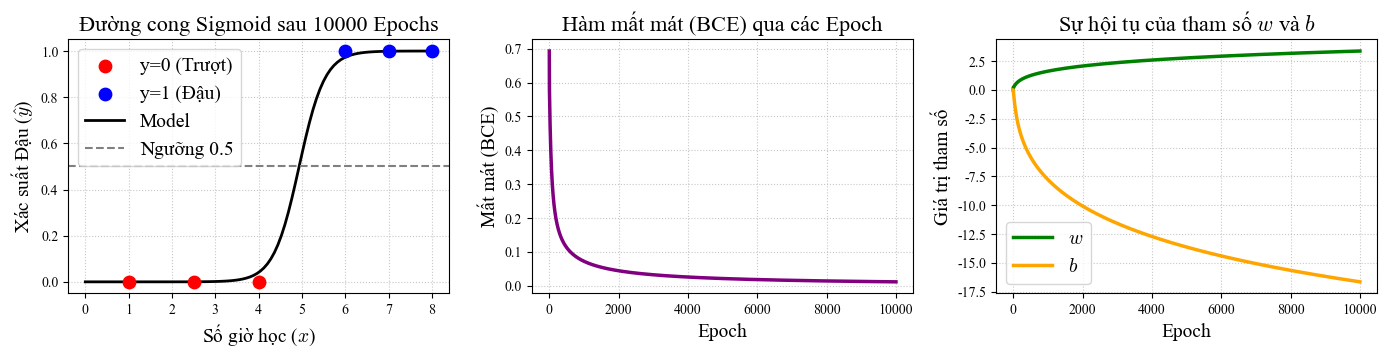


Đã tạo file PDF trực quan hóa thành công: logistic_regression_training_visual.pdf


In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# === 1. Cấu hình Matplotlib cho PDF (Giống các lần trước) ===
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'cm' # Font LaTeX cho đẹp
try:
    matplotlib.rcParams['font.serif'] = ['Times New Roman']
except:
    print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
matplotlib.rcParams['axes.unicode_minus'] = False

# === 2. Dữ liệu và Các hàm trợ giúp ===
# Dữ liệu từ Bảng 
data = np.array([
    [1.0, 0],
    [2.5, 0],
    [4.0, 0],
    [6.0, 1],
    [7.0, 1],
    [8.0, 1]
])

X = data[:, :1] # Shape (6, 1)
y = data[:, 1:] # Shape (6, 1)
N = len(y)      # N = 6

def sigmoid(z):
    """Hàm sigmoid."""
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):
    """Dự đoán đầu ra y_hat từ X, w, và b."""
    z = X @ w + b # (N, 1) @ (1, 1) + scalar -> (N, 1)
    return sigmoid(z)

def bce_loss(y_hat, y):
    """Tính hàm mất mát Binary Cross-Entropy."""
    epsilon = 0 # Tránh log(0)
    return (-y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)).mean()

# === 3. Huấn luyện Gradient Descent ===

# Siêu tham số
learning_rate = 0.2
epochs = 10000 # Chạy 100 epoch để thấy rõ sự hội tụ

# Khởi tạo tham số
# w phải là (1, 1) để tương thích với X (6, 1)
w = np.array([[0.0]]) 
b = 0.0

# Lưu lịch sử để vẽ
w_history = []
b_history = []
loss_history = []

print("Bắt đầu huấn luyện...")
for epoch in range(epochs + 1):
    # 1. Tính dự đoán (Forward Pass)
    y_hat = predict(X, w, b)
    
    # 2. Tính loss
    loss = bce_loss(y_hat, y)
    
    # 3. Lưu lại lịch sử
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss)
    
    # 4. Tính đạo hàm (Backward Pass)
    # Sai số (y_hat - y), shape (6, 1)
    error = y_hat - y
    
    # *** TỐI ƯU 1: Sử dụng công thức ma trận tổng quát cho grad_w ***
    # X.T (1, 6) @ error (6, 1) -> (1, 1). 
    # Đây là cách chuẩn và tổng quát, hoạt động ngay cả khi X có nhiều cột.
    grad_w = (X.T @ error) / N
    
    # grad_b là trung bình của sai số
    grad_b = error.mean()       
    
    # 5. Cập nhật tham số
    # w (1, 1) - scalar * (1, 1) -> (1, 1)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

print("Huấn luyện hoàn tất.")

# === 4. Kiểm tra và Xác minh Bảng "Tua nhanh" ===
print("\n" + "="*40)
print("XÁC MINH BẢNG TUA NHANH (Epoch 0-20)")
print("="*40)
epochs_to_check = [0, 1, 2, 5, 10, 50, 500, 2000, 10000]

# Tính dự đoán cho x=6.0 tại các mốc
x_5_test = np.array([[6.0]]) # Shape (1, 1)

for i in epochs_to_check:
    w_val = w_history[i]
    b_val = b_history[i]
    loss_val = loss_history[i]
    # Tính y_hat cho x=6.0 tại epoch i
    y_5_hat = predict(x_5_test, w_val, b_val).item() 
    
    # Phải dùng .item() để lấy giá trị vô hướng từ mảng w_val (shape 1, 1)
    print(f"Epoch {i:2d}: w = {w_val.item():7.4f}, b = {b_val:7.4f}, Loss = {loss_val:6.4f}, y_hat(6.0) = {y_5_hat:6.4f}")

print("="*40)

# === 5. Vẽ Biểu Đồ Trực Quan Hóa ===
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
# --- Biểu đồ 1: Đường cong Sigmoid cuối cùng ---
ax1.set_title(f'Đường cong Sigmoid sau {epochs} Epochs', fontsize=16)

# *** TỐI ƯU 2: Dùng .flatten() để điều kiện lọc rõ ràng hơn ***
# y.flatten() -> [0, 0, 0, 1, 1, 1]
y_flat = y.flatten()
# Vẽ các điểm dữ liệu
ax1.scatter(X[y_flat==0], y[y_flat==0], color='red', label='y=0 (Trượt)', s=80, zorder=3)
ax1.scatter(X[y_flat==1], y[y_flat==1], color='blue', label='y=1 (Đậu)', s=80, zorder=3)

# Vẽ đường cong Sigmoid
w_final = w_history[-1]
b_final = b_history[-1]
x_line = np.linspace(0, 8, 100).reshape(-1, 1)
y_line = predict(x_line, w_final, b_final)
ax1.plot(x_line, y_line, 'k-', label=f'Model', linewidth=2)

# Đường quyết định 0.5
ax1.axhline(0.5, color='gray', linestyle='--', label='Ngưỡng 0.5')
ax1.set_xlabel('Số giờ học ($x$)', fontsize=14)
ax1.set_ylabel('Xác suất Đậu ($\hat{y}$)', fontsize=14)
ax1.legend(fontsize=14)
ax1.grid(True, linestyle=':', alpha=0.7)

# --- Biểu đồ 2: Mất mát (BCE Loss) qua các Epoch ---
ax2.set_title('Hàm mất mát (BCE) qua các Epoch', fontsize=16)
ax2.plot(loss_history, color='purple', linewidth=2.5)
ax2.set_xlabel('Epoch', fontsize=14)
ax2.set_ylabel('Mất mát (BCE)', fontsize=14)
ax2.grid(True, linestyle=':', alpha=0.7)

# --- Biểu đồ 3: Tham số hội tụ (w, b) qua các Epoch ---
ax3.set_title('Sự hội tụ của tham số $w$ và $b$', fontsize=16)
# Chuyển list các mảng (1,1) thành list các số vô hướng để vẽ
ax3.plot([w.item() for w in w_history], color='green', label='$w$', linewidth=2.5)
ax3.plot(b_history, color='orange', label='$b$', linewidth=2.5)
ax3.set_xlabel('Epoch', fontsize=14)
ax3.set_ylabel('Giá trị tham số', fontsize=14)
ax3.legend(fontsize=14)
ax3.grid(True, linestyle=':', alpha=0.7)

# === 6. Lưu và Hiển thị ===
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_filename = 'logistic_regression_training_visual.pdf'
plt.savefig(output_filename, format='pdf', bbox_inches='tight')
plt.show()
plt.close()

print(f"\nĐã tạo file PDF trực quan hóa thành công: {output_filename}")

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


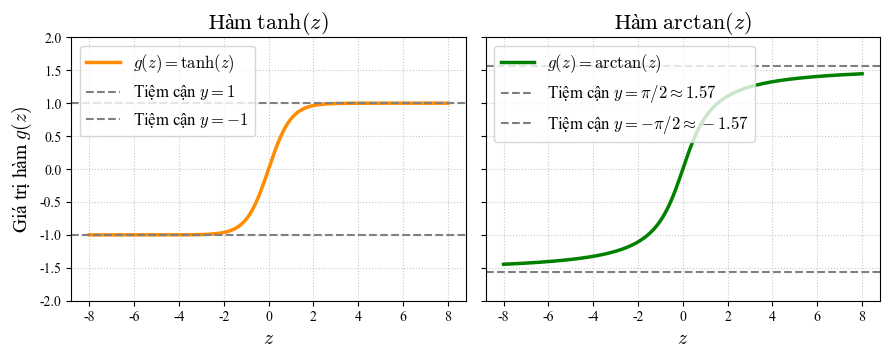

Đã tạo file PDF thành công: sigmoid_family_comparison.pdf
Lưu ý: Trục Y được chia sẻ chung, giới hạn bởi hàm arctan (khoảng [-1.57, 1.57]).


In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# === 1. Cấu hình Matplotlib cho PDF (Giống các lần trước) ===
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'cm' # Font LaTeX cho đẹp
try:
    matplotlib.rcParams['font.serif'] = ['Times New Roman']
except:
    print("Không tìm thấy font 'Times New Roman', sử dụng font serif mặc định.")
matplotlib.rcParams['axes.unicode_minus'] = False

# === 2. Tạo dữ liệu ===
# Sử dụng dải z đủ rộng để thấy rõ cả hai hàm
z = np.linspace(-8, 8, 400)

# Tính toán các giá trị hàm
y_tanh = np.tanh(z)
y_arctan = np.arctan(z)

# Tính các giá trị tiệm cận (asymptotes)
pi_2 = np.pi / 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)

# --- Biểu đồ 1: Hyperbolic Tangent (tanh) ---
ax1.plot(z, y_tanh, color='darkorange', linewidth=2.5, label=r'$g(z) = \tanh(z)$')
# Vẽ các đường tiệm cận
ax1.axhline(1, color='gray', linestyle='--', label='Tiệm cận $y=1$')
ax1.axhline(-1, color='gray', linestyle='--', label='Tiệm cận $y=-1$')
ax1.set_title(r'Hàm $\tanh(z)$', fontsize=16)
ax1.set_xlabel('$z$', fontsize=14)
ax1.set_ylabel('Giá trị hàm $g(z)$', fontsize=14)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(loc='upper left', fontsize=12)
ax1.set_ylim(-2, 2)

ax2.plot(z, y_arctan, color='green', linewidth=2.5, label=r'$g(z) = \arctan(z)$')
# Vẽ các đường tiệm cận
ax2.axhline(pi_2, color='gray', linestyle='--', label=r'Tiệm cận $y=\pi/2 \approx {:.2f}$'.format(pi_2))
ax2.axhline(-pi_2, color='gray', linestyle='--', label=r'Tiệm cận $y=-\pi/2 \approx {:.2f}$'.format(-pi_2))
ax2.set_title(r'Hàm $\arctan(z)$', fontsize=16)
ax2.set_xlabel('$z$', fontsize=14)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.legend(loc='upper left', fontsize=12)

# === 4. Lưu và hiển thị ===
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_filename = 'sigmoid_family_comparison.pdf'
plt.savefig(output_filename, format='pdf', bbox_inches='tight')
plt.show()
plt.close()

print(f"Đã tạo file PDF thành công: {output_filename}")
print(f"Lưu ý: Trục Y được chia sẻ chung, giới hạn bởi hàm arctan (khoảng [{-pi_2:.2f}, {pi_2:.2f}]).")

Đã tìm thấy 15 file. Đang tải...
Đã tải thành công 750 items từ 15 file.


/tmp/ipykernel_97043/696501460.py:324: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)



Hoàn tất! Các file .pdf đã được lưu.


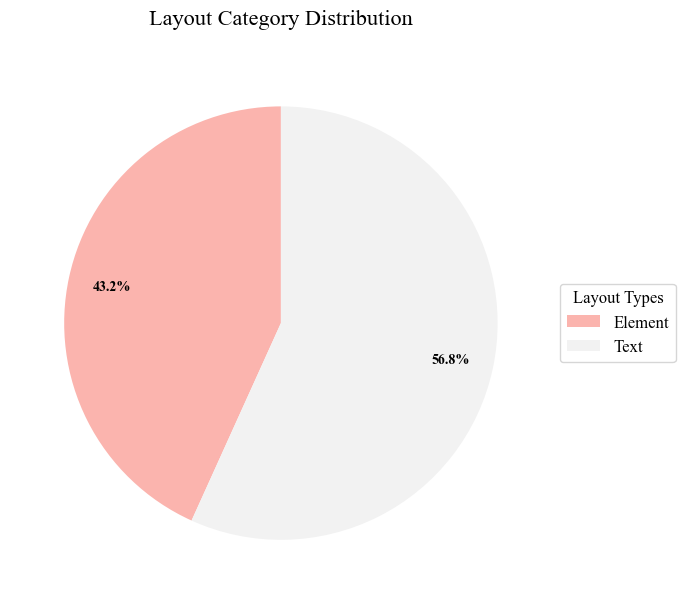

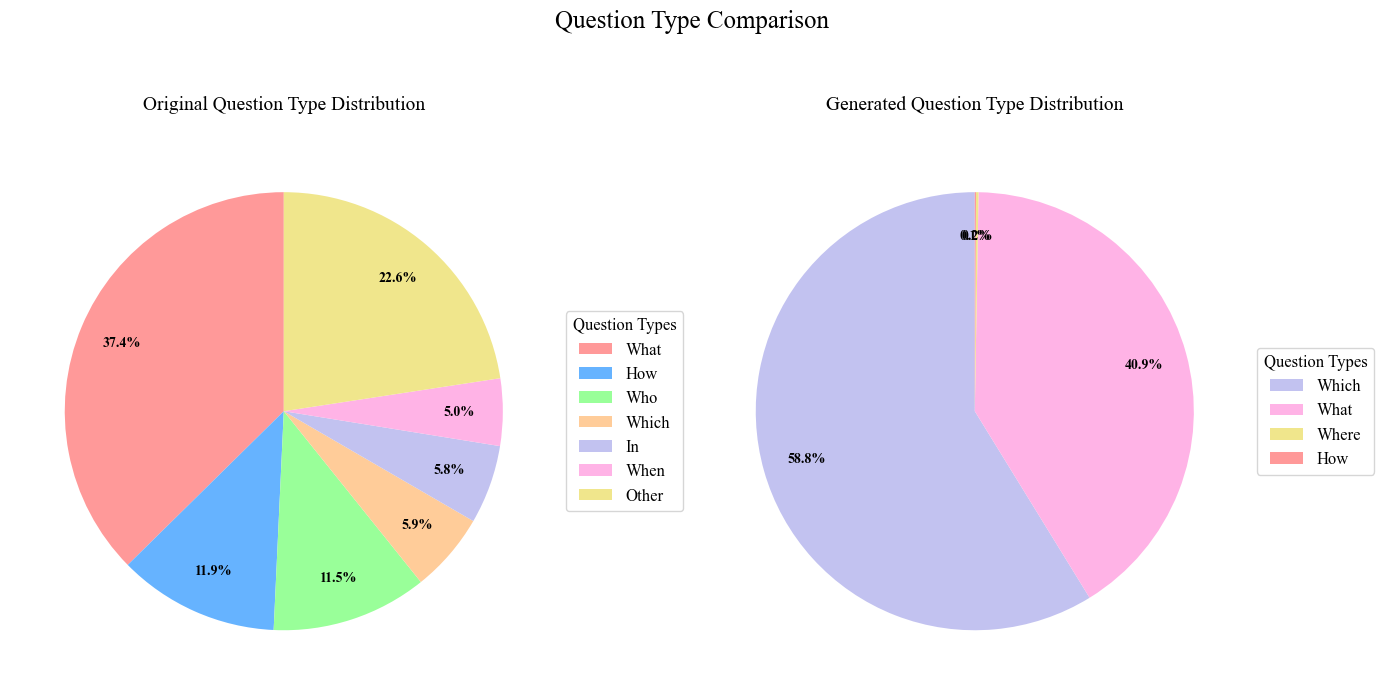

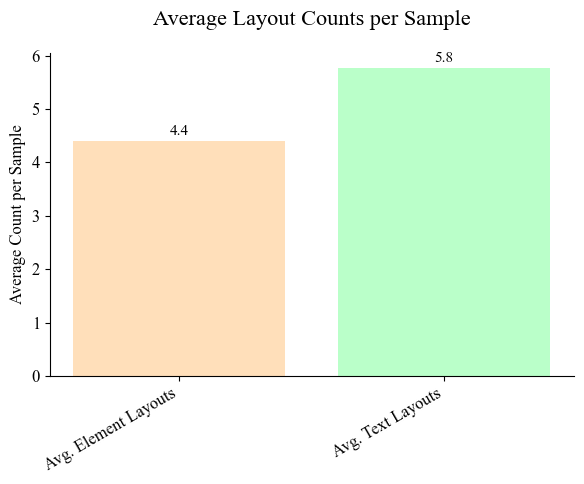

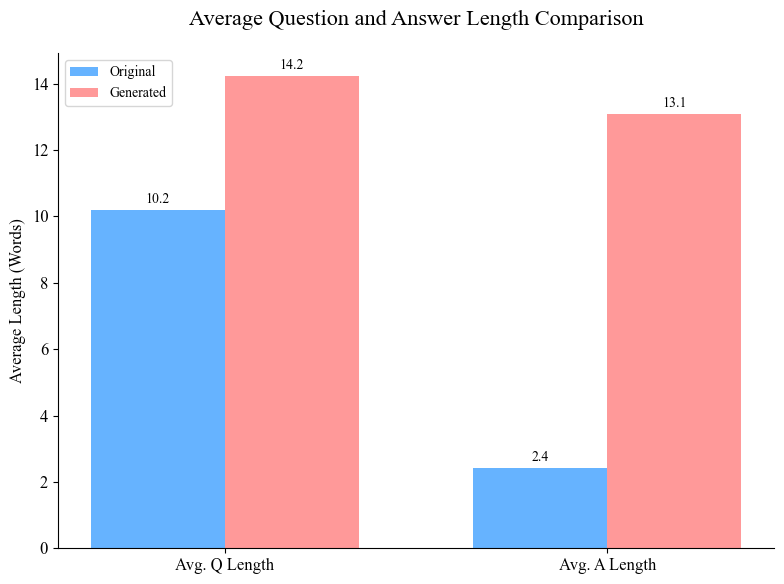

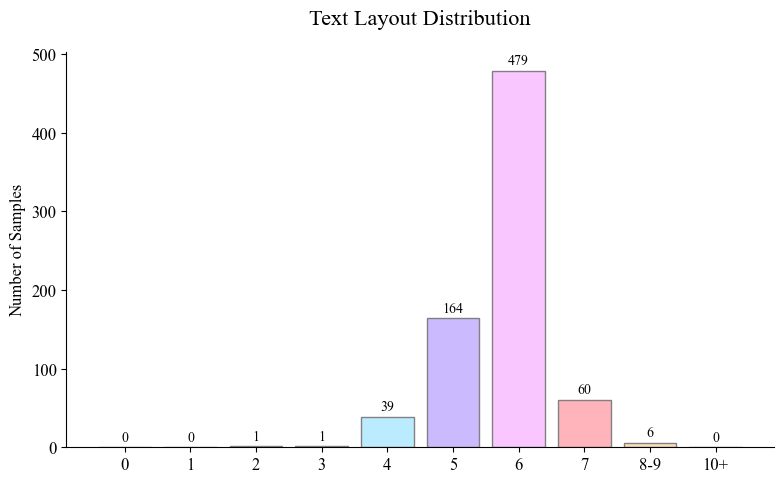

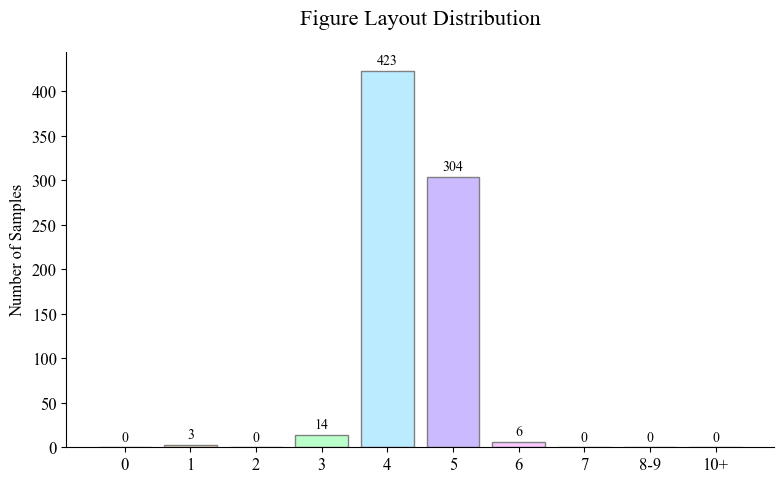

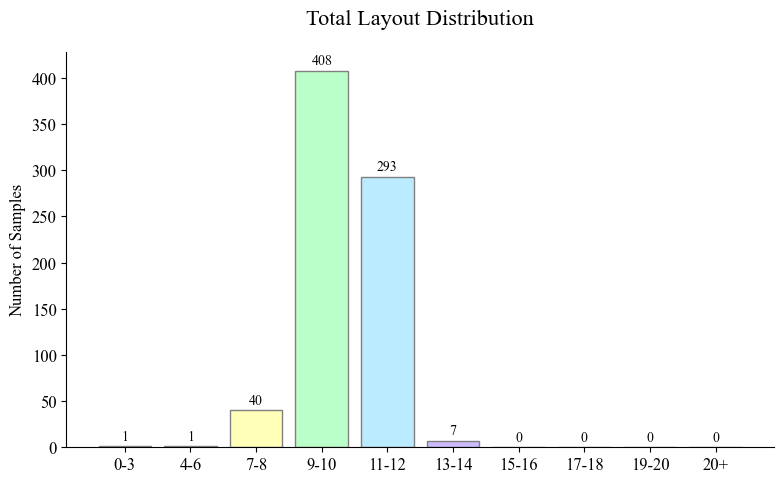

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
import re
import io
import json
import os
import glob

# --- Cài đặt Matplotlib ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['axes.unicode_minus'] = False

# --- 1. Hàm tải dữ liệu ---

def load_real_data(directory_path):
    """
    Tải tất cả các file wiki*.json từ thư mục được chỉ định.
    """
    data = []
    search_path = os.path.join(directory_path, "wiki*.json")
    file_paths = glob.glob(search_path)
    
    if not file_paths:
        print(f"Không tìm thấy file nào khớp '{search_path}'")
        return data

    print(f"Đã tìm thấy {len(file_paths)} file. Đang tải...")
    loaded_items_count = 0
    
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                content = json.load(f)
                if isinstance(content, list):
                    data.extend(content)
                    loaded_items_count += len(content)
                elif isinstance(content, dict):
                    data.append(content)
                    loaded_items_count += 1
                else:
                    print(f"Cảnh báo: File {file_path} chứa kiểu dữ liệu không mong muốn, bỏ qua.")
        except json.JSONDecodeError:
            print(f"Lỗi: Không thể decode JSON từ file: {file_path}")
        except Exception as e:
            print(f"Lỗi khi đọc file {file_path}: {e}")
            
    print(f"Đã tải thành công {loaded_items_count} items từ {len(file_paths)} file.")
    return data

def load_fake_data(num_samples=500):
    """
    Tạo dữ liệu giả, bao gồm cả 'generated_qa_pairs'.
    """
    fake_data = []
    q_types = ["What", "How many", "When", "Which", "Who", "Where", "Why", "Is"]
    gen_q_types = ["Which text", "What text", "Find the element", "Locate"]

    for i in range(num_samples):
        num_elements = random.randint(0, 10)
        num_texts = random.randint(0, 15)
        layers = []
        img_height = random.randint(800, 1600)
        img_width = random.randint(800, 1200)
        layers.append({"category": "base", "bottom_right": [img_height, img_width]})
        for _ in range(num_elements): layers.append({"category": "element"})
        for _ in range(num_texts): layers.append({"category": "text", "text": "Fake text"})

        # Thêm một category giả để kiểm tra tính linh hoạt
        if i % 10 == 0:
            layers.append({"category": "decoration"})

        num_qa = random.randint(0, 15)
        qa_pairs = []
        for _ in range(num_qa):
            q_type = random.choice(q_types)
            question = f"{q_type} is this a fake question number {random.randint(1, 100)}?"
            answer_text = "Fake answer " * random.randint(1, 10)
            qa_pairs.append({"question": question, "answers": {"text": [answer_text.strip()]}})

        num_gen_qa = random.randint(0, 8)
        gen_qa_pairs = []
        for _ in range(num_gen_qa):
            q_type = random.choice(gen_q_types)
            question = f"{q_type} relates to this element?"
            answer_text = "Fake generated answer " * random.randint(3, 8)
            gen_qa_pairs.append({"question": question, "answer": answer_text.strip()})

        fake_data.append({
            "index": i, 
            "layers_all": layers, 
            "original_qa_pairs": qa_pairs,
            "generated_qa_pairs": gen_qa_pairs
        })
    return fake_data

# --- 2. Hàm phân tích dữ liệu ---

def analyze_data(data):
    """
    Phân tích dữ liệu và trích xuất các thông số.
    """
    stats = {
        "image_widths": [], "image_heights": [],
        "num_elements": [], "num_texts": [], "num_all_layouts": [],
        "num_qa_pairs": [], "question_lengths": [], "answer_lengths": [], "question_types": [],
        "num_gen_qa_pairs": [], "gen_question_lengths": [], "gen_answer_lengths": [], "gen_question_types": [],
        "layout_categories": []
    }

    for item in data:
        base_layer = next((l for l in item['layers_all'] if l['category'] == 'base'), None)
        if base_layer:
            br = base_layer.get('bottom_right', [0, 0])
            if isinstance(br, list) and len(br) >= 2:
                stats['image_heights'].append(br[0])
                stats['image_widths'].append(br[1])

        item_elements = 0
        item_texts = 0
        layers = item.get('layers_all', [])
        for l in layers:
            cat = l.get('category')
            # Thêm 'base' vào list đếm
            if cat == 'element':
                item_elements += 1
                stats['layout_categories'].append('Element')
            elif cat == 'text':
                item_texts += 1
                stats['layout_categories'].append('Text')
            elif cat and cat != 'base': # Bỏ qua 'base' nhưng đếm các loại khác
                stats['layout_categories'].append(cat.capitalize())

        stats['num_elements'].append(item_elements)
        stats['num_texts'].append(item_texts)
        stats['num_all_layouts'].append(item_elements + item_texts) # Chỉ đếm tổng text/element

        qa_pairs = item.get('original_qa_pairs', []) 
        stats['num_qa_pairs'].append(len(qa_pairs))
        for qa in qa_pairs:
            q = qa.get('question')
            answers = qa.get('answers', {})
            answer_text_list = answers.get('text', [])
            if q and answer_text_list: 
                ans = answer_text_list[0] 
                stats['question_lengths'].append(len(q.split()))
                stats['answer_lengths'].append(len(ans.split()))
                match = re.match(r'^(\w+)', q)
                if match:
                    stats['question_types'].append(match.group(1))
        
        gen_qa_pairs = item.get('generated_qa_pairs', [])
        stats['num_gen_qa_pairs'].append(len(gen_qa_pairs))
        for qa in gen_qa_pairs:
            q = qa.get('question')
            ans = qa.get('answer')
            if q and ans:
                stats['gen_question_lengths'].append(len(q.split()))
                stats['gen_answer_lengths'].append(len(ans.split()))
                match = re.match(r'^(\w+)', q)
                if match:
                    stats['gen_question_types'].append(match.group(1))

    return stats

# --- 3. Hàm vẽ biểu đồ ---

def plot_layout_category_distribution(stats):
    """
    Vẽ pie chart phân bố layout (Element vs Text).
    *** ĐÃ SỬA LẠI ĐỂ LINH HOẠT VỚI MỌI CATEGORY ***
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    category_counts = Counter(stats['layout_categories'])
    
    # --- THAY ĐỔI LINH HOẠT ---
    # Tự động lấy tất cả các nhãn (categories)
    labels = sorted(category_counts.keys())
    # Lấy kích thước tương ứng
    sizes = [category_counts[label] for label in labels] 
    # --- KẾT THÚC THAY ĐỔI ---
    
    if sum(sizes) == 0:
        print("Không có dữ liệu layout 'element' hoặc 'text' để vẽ.")
        plt.close(fig)
        return

    # --- THAY ĐỔI LINH HOẠT ---
    # Tự động tạo đủ màu sắc cho N categories
    colors = plt.get_cmap('Pastel1')(np.linspace(0, 1, len(labels)))
    # --- KẾT THÚC THAY ĐỔI ---

    wedges, texts, autotexts = ax.pie(sizes, 
                                      autopct='%1.1f%%',
                                      startangle=90, 
                                      colors=colors, # Dùng list màu động
                                      pctdistance=0.8)

    ax.legend(wedges, labels, title="Layout Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10, weight="bold", color="black")
    ax.set_title("Layout Category Distribution", fontsize=16, pad=20)
    
    plt.tight_layout()
    plt.savefig("layout_category_distribution.pdf", bbox_inches='tight')

def plot_question_type_comparison(stats, top_n=6):
    """Gộp hai pie chart loại câu hỏi (Original và Generated) vào cùng một figure."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    # --- Biểu đồ Original Question Types (Vốn đã linh hoạt) ---
    ax1 = axes[0]
    type_counts_orig = Counter(stats['question_types'])
    if not type_counts_orig:
        ax1.set_title("Original Question Types (No Data)")
    else:
        top_types_orig = type_counts_orig.most_common(top_n)
        labels_orig = [t[0] for t in top_types_orig]
        sizes_orig = [t[1] for t in top_types_orig]
        other_count_orig = sum(type_counts_orig.values()) - sum(sizes_orig)
        if other_count_orig > 0:
            labels_orig.append("Other")
            sizes_orig.append(other_count_orig)
            
        colors_orig = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#f0e68c']
        wedges_orig, _, autotexts_orig = ax1.pie(sizes_orig, 
                                                 autopct='%1.1f%%',
                                                 startangle=90, 
                                                 colors=colors_orig[:len(labels_orig)],
                                                 pctdistance=0.8)
        ax1.legend(wedges_orig, labels_orig, title="Question Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts_orig, size=10, weight="bold", color="black")
        ax1.set_title("Original Question Type Distribution", fontsize=14, pad=20)

    # --- Biểu đồ Generated Question Types (Vốn đã linh hoạt) ---
    ax2 = axes[1]
    type_counts_gen = Counter(stats['gen_question_types'])
    if not type_counts_gen:
        ax2.set_title("Generated Question Types (No Data)")
    else:
        top_types_gen = type_counts_gen.most_common(top_n)
        labels_gen = [t[0] for t in top_types_gen]
        sizes_gen = [t[1] for t in top_types_gen]
        other_count_gen = sum(type_counts_gen.values()) - sum(sizes_gen)
        if other_count_gen > 0:
            labels_gen.append("Other")
            sizes_gen.append(other_count_gen)
            
        colors_gen = ['#c2c2f0','#ffb3e6','#f0e68c','#ff9999','#66b3ff','#99ff99', '#ffcc99']
        wedges_gen, _, autotexts_gen = ax2.pie(sizes_gen, 
                                              autopct='%1.1f%%',
                                              startangle=90, 
                                              colors=colors_gen[:len(labels_gen)],
                                              pctdistance=0.8)
        ax2.legend(wedges_gen, labels_gen, title="Question Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts_gen, size=10, weight="bold", color="black")
        ax2.set_title("Generated Question Type Distribution", fontsize=14, pad=20)
    
    plt.suptitle("Question Type Comparison", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.savefig("question_type_comparison.pdf", bbox_inches='tight')

def plot_qa_length_comparison(stats):
    """Biểu đồ cột đôi so sánh độ dài câu hỏi/trả lời."""
    categories = ['Avg. Q Length', 'Avg. A Length']
    
    orig_q_len = np.mean(stats['question_lengths']) if stats['question_lengths'] else 0
    gen_q_len = np.mean(stats['gen_question_lengths']) if stats['gen_question_lengths'] else 0
    orig_a_len = np.mean(stats['answer_lengths']) if stats['answer_lengths'] else 0
    gen_a_len = np.mean(stats['gen_answer_lengths']) if stats['gen_answer_lengths'] else 0

    original_values = [orig_q_len, orig_a_len]
    generated_values = [gen_q_len, gen_a_len]

    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width/2, original_values, width, label='Original', color='#66b3ff')
    rects2 = ax.bar(x + width/2, generated_values, width, label='Generated', color='#ff9999')
    
    ax.set_ylabel("Average Length (Words)", fontsize=12)
    ax.set_title("Average Question and Answer Length Comparison", fontsize=16, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=12)
    ax.legend(fontsize=10)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    autolabel(rects1)
    autolabel(rects2)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("qa_length_comparison.pdf", bbox_inches='tight')

def plot_avg_layout_statistics(stats):
    """Biểu đồ cột cho thống kê trung bình về Layout."""
    avg_stats = {
        "Avg. Element Layouts": np.mean(stats['num_elements']) if stats['num_elements'] else 0,
        "Avg. Text Layouts": np.mean(stats['num_texts']) if stats['num_texts'] else 0,
    }
    
    labels = list(avg_stats.keys())
    values = list(avg_stats.values())
    colors = ['#ffdfba', '#baffc9']
    
    fig, ax = plt.subplots(figsize=(6, 5))
    bars = ax.bar(labels, values, color=colors[:len(labels)])
    
    ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=12)
    ax.set_ylabel("Average Count per Sample", fontsize=12)
    ax.set_title("Average Layout Counts per Sample", fontsize=16, pad=20)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + (max(values) * 0.01), 
                f'{yval:.1f}', ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.savefig("avg_layout_statistics.pdf", bbox_inches='tight')

def plot_histogram(data, title, filename, bins, bin_labels):
    """Hàm trợ giúp chung để vẽ biểu đồ phân bố (histogram)."""
    if not data:
        print(f"Không có dữ liệu để vẽ histogram: {title}")
        return

    hist, _ = np.histogram(data, bins=bins)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#baebff', '#ccbaff', '#f9c6ff']
    bars = ax.bar(bin_labels, hist, color=colors[:len(bin_labels)], edgecolor='gray')

    ax.set_ylabel("Number of Samples", fontsize=12)
    ax.set_title(title, fontsize=16, pad=20)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + (max(hist) * 0.01), 
                f'{int(yval)}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f"{filename}.pdf", bbox_inches='tight')

def plot_layout_histograms(stats):
    """Vẽ 3 biểu đồ histogram cho layouts với các bin đã điều chỉnh."""
    
    # Bin cho Text Layouts
    text_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, np.inf] 
    text_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8-9', '10+']
    plot_histogram(stats['num_texts'], 
                   'Text Layout Distribution', 
                   'text_layout_distribution', 
                   bins=text_bins, bin_labels=text_labels)

    # Bin cho Figure (Element) Layouts
    figure_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, np.inf]
    figure_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8-9', '10+']
    plot_histogram(stats['num_elements'], 
                   'Figure Layout Distribution', 
                   'figure_layout_distribution', 
                   bins=figure_bins, bin_labels=figure_labels)
                   
    # Bin cho Total Layouts
    total_labels = ['0-3', '4-6', '7-8', '9-10', '11-12', '13-14', '15-16', '17-18', '19-20', '20+']
    total_bins = [0, 4, 7, 9, 11, 13, 15, 17, 19, 21, np.inf]
    
    plot_histogram(stats['num_all_layouts'], 
                   'Total Layout Distribution', 
                   'total_layout_distribution', 
                   bins=total_bins, bin_labels=total_labels)


# --- 4. Chạy chương trình ---

if __name__ == "__main__":
    
    data_directory = "/home/binhdt/hf_vqa/src/data/narrator/wiki"
    
    data = load_real_data(data_directory)

    if not data:
        print("Không tải được dữ liệu thật, chuyển sang dùng dữ liệu giả (fake data).")
        data = load_fake_data(num_samples=1000)

    if data:
        statistics = analyze_data(data)

        # 1. Biểu đồ tròn
        plot_layout_category_distribution(statistics)
        plot_question_type_comparison(statistics, top_n=6)
        
        # 2. Biểu đồ cột
        plot_avg_layout_statistics(statistics)
        plot_qa_length_comparison(statistics)
        
        # 3. Biểu đồ phân bố (Histograms)
        plot_layout_histograms(statistics)
        
        print("\nHoàn tất! Các file .pdf đã được lưu.")
        plt.show()
    else:
        print("Không có dữ liệu (cả thật và giả) để phân tích.")

In [1]:
import json
import os

json_files = os.listdir("/home/binhdt/hf_vqa/src/data/narrator/wiki")

for file in json_files:
    with open(os.path.join("/home/binhdt/hf_vqa/src/data/narrator/wiki", file), "r") as f:
        data = json.load(f)
    
    for item in data:
        # remove 'generated_qa_pairs'
        item.pop('generated_qa_pairs', None)
    with open(os.path.join("/home/binhdt/hf_vqa/src/data/narrator/wiki", file), "w") as f:
        json.dump(data, f, indent=2)
        
        
        
